In [ ]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt


In [ ]:
data1=pd.read_csv("/content/delivery_time.csv") #loading delivery time information

In [ ]:
data1.shape #two columns present  

(21, 2)

In [ ]:
data1.isnull() #no null values

,Delivery Time,Sorting Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
data1.dtypes #datatypes are correct

Delivery Time    float64
Sorting Time       int64
dtype: object

In [ ]:
data1[data1.duplicated()].shape #first row, second column is duplicate, 21 is there two times in sorting time

(0, 2)

In [ ]:
data1[data1.duplicated()] #no duplicated rows

,Delivery Time,Sorting Time


{'boxes': [<matplotlib.lines.Line2D at 0x7f826fed81d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f826feec8d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f826ff2fd10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f826ff2fa10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f826fed85d0>,
  <matplotlib.lines.Line2D at 0x7f826feec810>]}

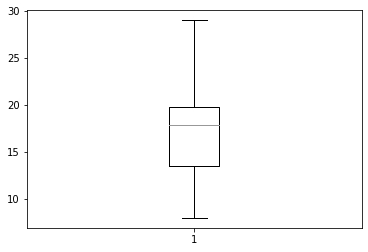

In [ ]:
plt.boxplot(data1['Delivery Time']) #no outliers present in Delivery time

{'boxes': [<matplotlib.lines.Line2D at 0x7f826f61a410>],
 'caps': [<matplotlib.lines.Line2D at 0x7f826f5eba10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f826f705850>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f826f5f3510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f826f61a810>,
  <matplotlib.lines.Line2D at 0x7f826f5eb4d0>]}

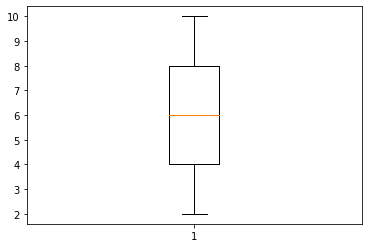

In [ ]:
plt.boxplot(data1['Sorting Time']) #no outliers for sorting time

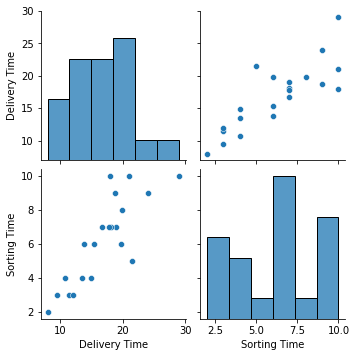

In [ ]:
import seaborn as sns
sns.pairplot(data1)

In [ ]:
data1.corr() #positive correlation of 0.825

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [ ]:
data1.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
array=data1.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX1=scaler.fit_transform(array)
#transformed data
set_printoptions(precision=2)
print(rescaledX1[:,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]
 [0.35 0.5 ]
 [0.52 0.62]
 [0.07 0.12]
 [0.47 1.  ]
 [0.51 0.88]
 [0.56 0.75]
 [0.13 0.25]
 [0.41 0.62]
 [0.17 0.12]
 [0.19 0.12]
 [0.33 0.25]
 [0.27 0.5 ]
 [0.48 0.62]
 [0.   0.  ]
 [0.47 0.62]
 [0.64 0.38]]


In [ ]:
from sklearn.preprocessing import StandardScaler
array=data1.values
scaler=StandardScaler().fit(array)
resclaedX1=scaler.transform(array)
set_printoptions(precision=2)
print(rescaledX1[:,:])

[[0.62 1.  ]
 [0.26 0.25]
 [0.56 0.5 ]
 [0.76 0.88]
 [1.   1.  ]
 [0.35 0.5 ]
 [0.52 0.62]
 [0.07 0.12]
 [0.47 1.  ]
 [0.51 0.88]
 [0.56 0.75]
 [0.13 0.25]
 [0.41 0.62]
 [0.17 0.12]
 [0.19 0.12]
 [0.33 0.25]
 [0.27 0.5 ]
 [0.48 0.62]
 [0.   0.  ]
 [0.47 0.62]
 [0.64 0.38]]


In [ ]:
rescaledXn=pd.DataFrame(rescaledX1,columns=['Delivery Time', 'Sorting Time'])

In [ ]:
print(rescaledXn)

    Delivery Time  Sorting Time
0        0.619048         1.000
1        0.261905         0.250
2        0.559524         0.500
3        0.761905         0.875
4        1.000000         1.000
5        0.350000         0.500
6        0.523810         0.625
7        0.071429         0.125
8        0.471429         1.000
9        0.511905         0.875
10       0.563333         0.750
11       0.130952         0.250
12       0.413333         0.625
13       0.166667         0.125
14       0.191905         0.125
15       0.327619         0.250
16       0.273810         0.500
17       0.481429         0.625
18       0.000000         0.000
19       0.468095         0.625
20       0.642857         0.375


In [ ]:
import statsmodels.formula.api as smf
model11=smf.ols("data1['Delivery Time']~data1['Sorting Time']", data=data1).fit()

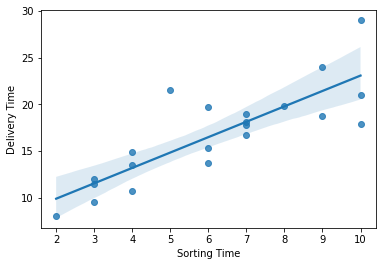

In [ ]:
sns.regplot(x='Sorting Time', y='Delivery Time', data=data1)

In [ ]:
model11.params

Intercept                6.582734
data1['Sorting Time']    1.649020
dtype: float64

In [ ]:
model11.rsquared

0.6822714748417231

In [ ]:
model12=smf.ols("rescaledXn['Delivery Time']~rescaledXn['Sorting Time']", data=rescaledXn).fit()

In [ ]:
model12.params

Intercept                     0.089561
rescaledXn['Sorting Time']    0.628198
dtype: float64

In [ ]:
model12.rsquared #the rsquared values for the normalised dataset and the given data set is the same 

0.6822714748417231

In [ ]:
data2=pd.read_csv("/content/Salary_Data.csv")

In [ ]:
data2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data2.isnull() #no null values present

,YearsExperience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [ ]:
data2[data2.duplicated()].shape

(0, 2)

In [ ]:
data2.shape

(30, 2)

In [ ]:
data2.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
data2[data2.duplicated()]#no duplicated rows

,YearsExperience,Salary


{'boxes': [<matplotlib.lines.Line2D at 0x7f825035f6d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f825040f890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8250392f10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8250392a10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f825044bf50>,
  <matplotlib.lines.Line2D at 0x7f8250630d50>]}

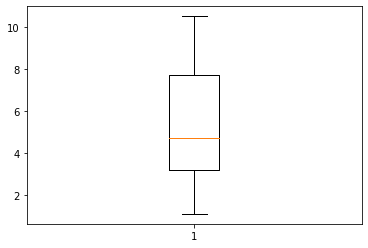

In [ ]:
plt.boxplot(data2['YearsExperience']) #no outliers

{'boxes': [<matplotlib.lines.Line2D at 0x7f8250685bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f82506cacd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f825043ad50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f825074c310>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f825b666050>,
  <matplotlib.lines.Line2D at 0x7f825d7a0310>]}

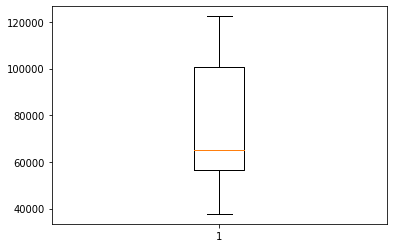

In [ ]:
plt.boxplot(data2['Salary']) #no outliers

In [ ]:
data2.corr() #correlation between salary hikes and years of experience

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


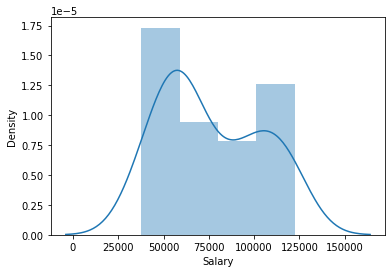

In [ ]:
sns.distplot(data2['Salary'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


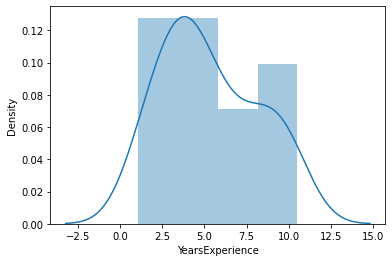

In [ ]:
sns.distplot(data2['YearsExperience'])

In [ ]:
array=data2.values
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX1=scaler.fit_transform(array)
#transformed data
set_printoptions(precision=2)
print(rescaledX1[:,:]) #printing normalized values

[[0.   0.02]
 [0.02 0.1 ]
 [0.04 0.  ]
 [0.1  0.07]
 [0.12 0.03]
 [0.19 0.22]
 [0.2  0.26]
 [0.22 0.2 ]
 [0.22 0.32]
 [0.28 0.23]
 [0.3  0.3 ]
 [0.31 0.21]
 [0.31 0.23]
 [0.32 0.23]
 [0.36 0.28]
 [0.4  0.36]
 [0.43 0.33]
 [0.45 0.54]
 [0.51 0.52]
 [0.52 0.66]
 [0.61 0.64]
 [0.64 0.72]
 [0.72 0.75]
 [0.76 0.9 ]
 [0.81 0.85]
 [0.84 0.8 ]
 [0.89 0.94]
 [0.9  0.88]
 [0.98 1.  ]
 [1.   0.99]]


In [ ]:
model2=smf.ols("YearsExperience~Salary", data=data2).fit()

In [ ]:
sns.regplot(x="years of exp",y="salary",data=data2)

KeyError: ignored

In [ ]:
model2.params

Intercept   -2.383161
Salary       0.000101
dtype: float64

In [ ]:
model2.rsquared

0.9569566641435086

In [ ]:
print(model2.tvalues,'\n', model2.pvalues) #pvalues are much lesser than 0.05

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [ ]:
print(model11.tvalues,'\n',model11.pvalues)

Intercept                3.823349
data1['Sorting Time']    6.387447
dtype: float64 
 Intercept                0.001147
data1['Sorting Time']    0.000004
dtype: float64
